<img src="imgs/mioti_empire.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S4: Data augmentation

`General, sabemos que quiere dejar las trincheras para pasar a su nuevo cargo de LORD DE LOS DATOS en el IMPERIO GALÁCTICO. Está usted a prueba con dos sistemas críticos para el IMPERIO GALÁCTICO. El primero, tratará de mejorar nuestra capacidad predictiva de catástrofes en nuestros famosos StarDestroyer®. El segundo, deberá de encontrar un sistema de detección de transimisiones enemigas que evite catástrofes como la incursión en Scarif que robó nuestros planos de la Estrella de la Muerte®. Esta será su carta de presentación.`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

import random
random.seed(1234)

### Predicción de catástrofes en StarDestroyer®

`General, se le dispone del siguiente dataset que contiene datos tanto de pasaje civil como militar. Sin embargo, nuestros sistemas de predicción no han conseguido resultados. QUEREMOS SABER QUIÉN TIENE MÁS POSIBILIDADES DE MORIR EN UN POSIBLE ATAQUE A NUESTRO STARDESTROYER®, y por lo tanto, necesitamos mejorar nuestra información al respecto.`

`PARA ELLO, NECESITAMOS OBTENER AL MENOS 5 VARIABLES NUEVAS DESDE NUESTRO DATASET, TENIENDO EN CUENTA QUE SI GENERAMOS 5 VARIABLES 'DUMMY' A PARTIR DE UNA VARIABLE ORIGEN, ÚNICAMENTE CUENTAN COMO 1 VARIABLE`

`Debe tener en cuenta siempre que:`

`1. Las cabinas más vulnerables se encuentran en storage_decks con una protectora pero insuficiente capa blindada de film de aluminio. Posteriormente, en la parte media del conjunto middle_decks.`      
`2. En momentos de ataque, mujeres y niños intentarán ser rescatados primero.`      
`3. El Imperio otorga privilegios a las clases altas y sobre todo a altos cargos.`       
`4. Piense y estudie cómo podría funcionar una nave como esta en situación de pánico. Decida y razone sus nuevas variables`

In [2]:
df_starkiller = pd.read_csv('data/starkiller_population.csv')

In [3]:
df_starkiller.head(10)

,age,area,cabin,embarqued,fare,name,sex,ticket
0,27,Storage decks,D251,Endor,2229731₩,Mr. Peter Fisher,Male,D
1,36,Middle decks,D472,Mustafar,2711626₩,Mr. Jared Bowers,Male,D
2,16,Lower decks,D87,Coruscant,897633₩,Mr. Kevin Odonnell,Male,D
3,20,Middle decks,E404,Coruscant,2537987₩,Mr. Peter Montgomery,Male,E
4,60,Bohemian views decks,X431,Naboo,109₩,Commander William Patrick,Male,X
5,39,Lower decks,E147,Coruscant,5375024₩,Mr. Nicholas Nolan,Male,E
6,16,Middle decks,D127,Endor,1894874₩,Mr. Brian Hamilton,Male,D
7,21,Laser decks,F128,Endor,492288₩,Lt. Vincent Woods,Male,F1
8,19,Lower decks,D244,Coruscant,1104020₩,Mr. Robert Dunn,Male,D
9,24,Lower decks,D257,Endor,4558665₩,Mr. James Summers,Male,D


In [4]:
## TU CÓDIGO AQUÍ
df_starkiller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        350 non-null    int64 
 1   area       350 non-null    object
 2   cabin      350 non-null    object
 3   embarqued  350 non-null    object
 4   fare       350 non-null    object
 5   name       350 non-null    object
 6   sex        350 non-null    object
 7   ticket     350 non-null    object
dtypes: int64(1), object(7)
memory usage: 22.0+ KB


In [5]:
#Variable 1.
#Hacemos dummy variables de la columna que representa la variable categórica "area". Así se podrá identificar de mejora forma
#los pasajeros que se situen en las zonas más peligrosas como StorageDesk y MiddleDesk
df_starkiller_copy=pd.get_dummies(df_starkiller,columns=['area'])
df_starkiller_copy

,age,cabin,embarqued,fare,name,sex,ticket,area_Bohemian views decks,area_Cannon decks,area_Experimental decks,area_Laser decks,area_Lower decks,area_Middle decks,area_Storage decks
0,27,D251,Endor,2229731₩,Mr. Peter Fisher,Male,D,0,0,0,0,0,0,1
1,36,D472,Mustafar,2711626₩,Mr. Jared Bowers,Male,D,0,0,0,0,0,1,0
2,16,D87,Coruscant,897633₩,Mr. Kevin Odonnell,Male,D,0,0,0,0,1,0,0
3,20,E404,Coruscant,2537987₩,Mr. Peter Montgomery,Male,E,0,0,0,0,0,1,0
4,60,X431,Naboo,109₩,Commander William Patrick,Male,X,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,33,F2349,Coruscant,415792₩,Lt. Brianna Davis,Female,F2,0,0,0,1,0,0,0
346,39,D469,Endor,300797₩,Miss Christina Brooks,Female,D,0,0,0,0,1,0,0
347,42,D15,Coruscant,5633128₩,Mrs. Kimberly Pineda,Female,D,0,0,0,0,0,1,0
348,58,D140,Coruscant,4116058₩,Mrs. Ashley Hardy,Female,D,0,0,0,0,0,1,0


In [6]:
# Variable 2.
# Como son objetivo de ser rescatados de forma prioritaria en un ataque, identificaremos a los menores mediante otra
# columna llamada Menor. Iran a 1 los menores de 18 años.

def detectar_menores(edad):
    if edad < 18:
        temp = 1
    else:
        temp = 0
    return temp


df_starkiller_copy['menor'] = df_starkiller_copy.age.apply(detectar_menores)
df_starkiller_copy.loc[:, ['name', 'age', 'sex', 'menor']]

,name,age,sex,menor
0,Mr. Peter Fisher,27,Male,0
1,Mr. Jared Bowers,36,Male,0
2,Mr. Kevin Odonnell,16,Male,1
3,Mr. Peter Montgomery,20,Male,0
4,Commander William Patrick,60,Male,0
...,...,...,...,...
345,Lt. Brianna Davis,33,Female,0
346,Miss Christina Brooks,39,Female,0
347,Mrs. Kimberly Pineda,42,Female,0
348,Mrs. Ashley Hardy,58,Female,0


In [7]:
# Variable 3.
# Como los cargos también serán otros de los que tendran prioridad en el caso de rescate vamos a identificarlos claramente.
# Identificamos los cargos haciendo filtro sobre el name. entendemos que son cargos del imperio:
# lt - Teniente y Commander - Comandante.
# El resto de tratamiento 'Mrs.|Mr.|Miss|Ms.' entendemos que son pasajeros sin cargo en el imperio.

df_starkiller_copy['cargo'] = df_starkiller_copy['name'].apply(
    lambda x: 1 if (re.search('Lt|Commander', x)) else 0)
df_starkiller_copy.loc[:,['name','age','sex','menor','cargo']]

,name,age,sex,menor,cargo
0,Mr. Peter Fisher,27,Male,0,0
1,Mr. Jared Bowers,36,Male,0,0
2,Mr. Kevin Odonnell,16,Male,1,0
3,Mr. Peter Montgomery,20,Male,0,0
4,Commander William Patrick,60,Male,0,1
...,...,...,...,...,...
345,Lt. Brianna Davis,33,Female,0,1
346,Miss Christina Brooks,39,Female,0,0
347,Mrs. Kimberly Pineda,42,Female,0,0
348,Mrs. Ashley Hardy,58,Female,0,0


In [8]:
# Variable 4.
# Consideramos que identificar a familias será también algo muy importante a la hora de quien se pueda salvar.

def detecta_apellidos(name):
    return name[2]


df_starkiller_copy['familia'] = df_starkiller_copy['name'].str.split(
    ' ').apply(detecta_apellidos)
df_starkiller_copy.loc[:,['name','age','sex','menor','cargo','familia']]

,name,age,sex,menor,cargo,familia
0,Mr. Peter Fisher,27,Male,0,0,Fisher
1,Mr. Jared Bowers,36,Male,0,0,Bowers
2,Mr. Kevin Odonnell,16,Male,1,0,Odonnell
3,Mr. Peter Montgomery,20,Male,0,0,Montgomery
4,Commander William Patrick,60,Male,0,1,Patrick
...,...,...,...,...,...,...
345,Lt. Brianna Davis,33,Female,0,1,Davis
346,Miss Christina Brooks,39,Female,0,0,Brooks
347,Mrs. Kimberly Pineda,42,Female,0,0,Pineda
348,Mrs. Ashley Hardy,58,Female,0,0,Hardy


In [9]:
# Variable 5.
# Si ya eres familiar de un alto cargo pues como enchufado que eres fijo que te salvas.
# En esta primera parte detectamos a las familias de los altos cargos con más de un miembro.
temp_1 = df_starkiller_copy.groupby(
    by=['cargo', 'familia'], as_index=False).size()
temp_1 = temp_1[(temp_1['size'] > 1) & (temp_1['cargo'] == 1)]
temp_1

,cargo,familia,size
215,1,Davis,2
219,1,Fischer,2
221,1,Garcia,2
231,1,Johnson,3
253,1,Nunez,2
265,1,Rivera,2
276,1,Turner,2


In [10]:
# En esta segunda parte una vez tenemos las familias de altos cargos con mas de un componente en el pasaje, creamos
# una nueva columna familiacargo paa identificarlos de forma fácil.
familias = "|".join(temp_1['familia'])

df_starkiller_copy['familiacargo'] = df_starkiller_copy['familia'].apply(
    lambda x: 1 if (re.search(familias, x)) else 0)

df_starkiller_copy[df_starkiller_copy['familiacargo'] == 1].sort_values(by=[
                                                                        'familia']).loc[:,['name','age','sex','menor','cargo','familia','familiacargo']]

,name,age,sex,menor,cargo,familia,familiacargo
345,Lt. Brianna Davis,33,Female,0,1,Davis,1
280,Commander Susan Davis,64,Female,0,1,Davis,1
299,Mrs. Sherry Davis,22,Female,0,0,Davis,1
191,Lt. Jeffery Fischer,25,Male,0,1,Fischer,1
151,Lt. Drew Fischer,32,Male,0,1,Fischer,1
33,Mr. Jeffery Garcia,36,Male,0,0,Garcia,1
35,Lt. Andrew Garcia,27,Male,0,1,Garcia,1
58,Commander William Garcia,70,Male,0,1,Garcia,1
107,Mr. Christian Johnson,18,Male,0,0,Johnson,1
231,Lt. Nicholas Johnson,19,Male,0,1,Johnson,1


In [11]:
df_starkiller_copy

,age,cabin,embarqued,fare,name,sex,ticket,area_Bohemian views decks,area_Cannon decks,area_Experimental decks,area_Laser decks,area_Lower decks,area_Middle decks,area_Storage decks,menor,cargo,familia,familiacargo
0,27,D251,Endor,2229731₩,Mr. Peter Fisher,Male,D,0,0,0,0,0,0,1,0,0,Fisher,0
1,36,D472,Mustafar,2711626₩,Mr. Jared Bowers,Male,D,0,0,0,0,0,1,0,0,0,Bowers,0
2,16,D87,Coruscant,897633₩,Mr. Kevin Odonnell,Male,D,0,0,0,0,1,0,0,1,0,Odonnell,0
3,20,E404,Coruscant,2537987₩,Mr. Peter Montgomery,Male,E,0,0,0,0,0,1,0,0,0,Montgomery,0
4,60,X431,Naboo,109₩,Commander William Patrick,Male,X,1,0,0,0,0,0,0,0,1,Patrick,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,33,F2349,Coruscant,415792₩,Lt. Brianna Davis,Female,F2,0,0,0,1,0,0,0,0,1,Davis,1
346,39,D469,Endor,300797₩,Miss Christina Brooks,Female,D,0,0,0,0,1,0,0,0,0,Brooks,0
347,42,D15,Coruscant,5633128₩,Mrs. Kimberly Pineda,Female,D,0,0,0,0,0,1,0,0,0,Pineda,0
348,58,D140,Coruscant,4116058₩,Mrs. Ashley Hardy,Female,D,0,0,0,0,0,1,0,0,0,Hardy,0


### Detección de transmisiones

`Se le dispondrá de un set de datos extraído de los últimos intentos de ataque en nuestro silo de planos de armas secretas. Estos datos muestran obviamente y gracias al trabajo del antiguo general al mando, ya *jubilado*, un problema grave de desbalanceo en cuanto a tipología de los datos, así que será su labor trabajar con ellos para conseguir un balanceo orden y deacuerdo a las directrices del glorioso IMPERIO GALÁCTICO.`

`Como primera tarea, se le solicita un primer vistazo a los datos.`

In [12]:
tr = pd.read_csv("data/transmission_small.csv")

In [13]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100492 entries, 0 to 100491
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      100492 non-null  float64
 1   V2      100492 non-null  float64
 2   class   100492 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.3 MB


In [14]:
tr.head(10)

,V1,V2,class
0,2.049094,0.186189,0
1,2.125540,-0.030714,0
2,-4.155859,-5.705748,0
3,-0.566420,-0.579576,0
4,0.060858,-0.261762,0
5,-1.103430,1.121015,0
6,2.219720,-1.432613,0
7,2.060998,0.050476,0
8,1.611819,-0.552408,0
9,0.965927,-0.182787,0


In [15]:
tr.tail(10)

,V1,V2,class
100482,-7.347955,2.397041,1
100483,-2.866364,2.346949,1
100484,-1.644403,3.129852,1
100485,-0.082983,-3.935919,1
100486,-1.430864,-0.802529,1
100487,-0.613696,3.698772,1
100488,-6.713407,3.921104,1
100489,-6.423306,1.658515,1
100490,-2.125490,5.973556,1
100491,-4.617217,1.695694,1


In [16]:
tr.value_counts()

V1          V2          class
 2.055797   -0.326668   0        32
 1.245674    0.166975   0        29
 1.302378   -0.606529   0        25
 2.053311    0.089735   0        21
 2.040211   -0.146975   0        18
                                 ..
 1.156707   -0.214330   0         1
 1.156714   -1.072468   0         1
 1.156722   -0.005543   0         1
 1.156727   -0.141245   0         1
-41.928738  -40.803981  0         1
Length: 98715, dtype: int64

In [17]:
tr['class'].value_counts()

0    100000
1       492
Name: class, dtype: int64

`Se necesita entender la magnitud del problema. Informe del posible desbalanceo de los datos, tanto por escrito como mediante la gráfica que usted considere oportuna`

In [18]:
tr['class'].value_counts()

0    100000
1       492
Name: class, dtype: int64

Text(0.5, 0, 'class')

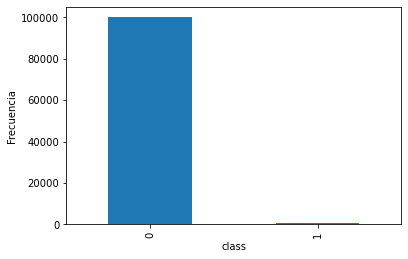

In [19]:
%matplotlib inline
ax=tr['class'].value_counts().plot.bar()
ax.set_ylabel('Frecuencia')
ax.set_xlabel('class')

* Como podemos observar:

    * Hay 100000 tuplas de valores V1,V2 marcadas como 'class' 0.
    * Hay 492 tuplas de valores V1,V2 marcadas como 'class' 1.
    <br>
    
* Por lo que parece que los valores "anormales" o "no comunes" son los marcados con **'class' = 1**. Claramente están desbalanceados

`También deberá conocer en qué rango se manejan los datos y con qué estamos trabajando. Una gráfica de puntos podría ser lo más adecuado ahora.`

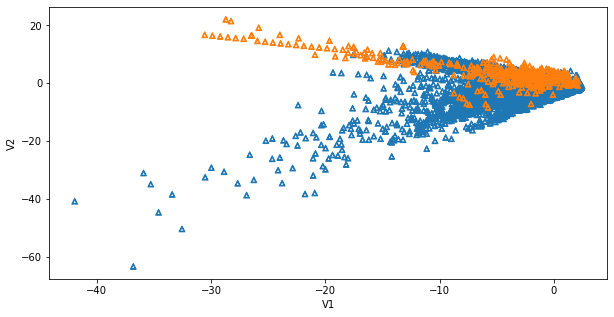

In [20]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
colors = tr['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr['V1'], 
    y = tr['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

* Vemos que sobre todo se concentran trasmisiones sospechosas para valores de V2 positivos de entre 0 y 20 y para valores de V1 principalmente entre -10 y 10

`Le proponemos ahora una función sencilla para evaluar su sistema de mejora de los datos. Esta función no deberá modificarse y como único requisito deberá de suministrar los datos como parámetro.`

In [21]:
def evaluar_sistema(data_variables, class_variable):
    # Recibe:
    # - data_variables: dataframe con dos columnas siendo estas las variables de datos.
    # - class_variable: dataframe con una columna siendo esta la clase de transmisión.
    # Imprime:
    # - puntuación de clasificación.
    print("Evaluando...")
    clf = LogisticRegression().fit(data_variables, class_variable.values.ravel())
    predicted = clf.predict(data_variables)
    
    puntos = 0
    for ci, pi in zip(class_variable.values.ravel(), predicted):
        if ci != pi:
            n = 1 if ci == 0 else 50
        else:
            n = 0
        puntos += n
        
    print("Puntuación obtenida: {} (más alta es peor)".format(puntos))

In [22]:
evaluar_sistema(tr[['V1', 'V2']], tr[['class']])

Evaluando...
Puntuación obtenida: 21889 (más alta es peor)


***

`Ahora el trabajo es todo suyo, General. Deberá trabajar con nuestros datos y conseguir disminuir esa puntuación al máximo posible. Documente todos los pasos e incluya de sus valoraciones al final del informe.`

`
Le solicitamos la comprobación de al menos tres técnicas de data augmentation y al menos un caso en el que dos técnicas se combinen para obtener los resultados.`

In [23]:
## Introduce todos los pasos que consideres necesarios y posteriormente, evalúa tus datos. ¡Que el lado oscuro te acompañe!

Filas que nos quedamos con RandomUnderSampler: 984
Evaluando...
Puntuación obtenida: 6617 (más alta es peor)


<AxesSubplot:>

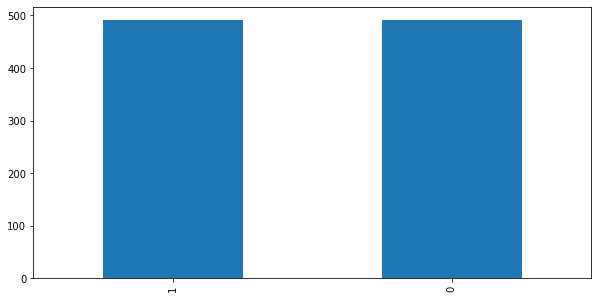

In [24]:
#TÉCNICA 1 DATA AUGMENTATION - UNDERSAMPLING: RandomUnderSampler
#Utilizamos el método más básico de Undersampling en el que ataca el datset de forma aleatoria.

rus = RandomUnderSampler(random_state = 0)
rus.fit_resample(tr[['V1', 'V2']], tr[['class']])
print('Filas que nos quedamos con RandomUnderSampler:', len(rus.sample_indices_))
tr_undersampled = tr.iloc[rus.sample_indices_]
evaluar_sistema(tr_undersampled[['V1', 'V2']], tr_undersampled[['class']])
tr_undersampled['class'].value_counts().plot.bar()

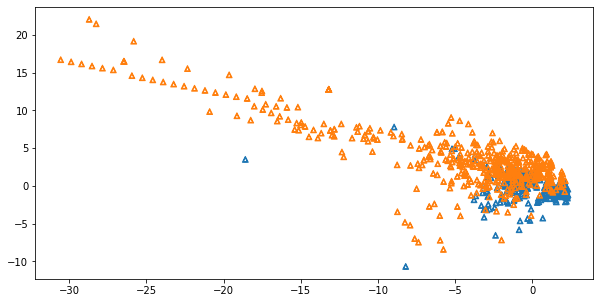

In [25]:
colors = tr_undersampled['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_undersampled['V1'], 
    y = tr_undersampled['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

Filas que nos quedamos con TomekLinks: 100308
Evaluando...
Puntuación obtenida: 21837 (más alta es peor)


<AxesSubplot:>

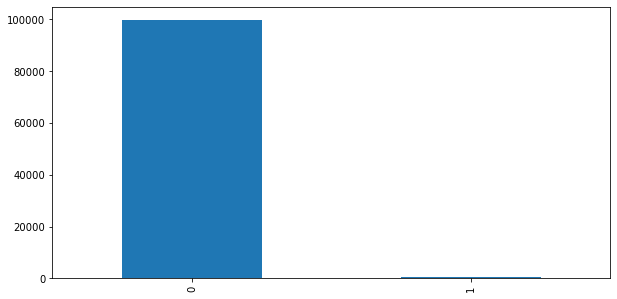

In [26]:
#TÉCNICA 2 DATA AUGMENTATION - UNDERSAMPLING: TomekLinks
#Utilizamos el método TomekLinks

tlu = TomekLinks()
tlu.fit_resample(tr[['V1', 'V2']], tr[['class']])
print('Filas que nos quedamos con TomekLinks:', len(tlu.sample_indices_))
tr_tomek = tr.iloc[tlu.sample_indices_]
evaluar_sistema(tr_tomek[['V1', 'V2']], tr_tomek[['class']])
tr_tomek['class'].value_counts().plot.bar()

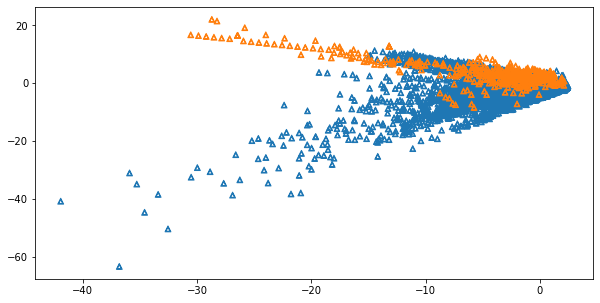

In [27]:
colors = tr_tomek['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_tomek['V1'], 
    y = tr_tomek['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

Filas que nos quedamos con EditedNearestNeighbours: 97837
Evaluando...
Puntuación obtenida: 21147 (más alta es peor)


<AxesSubplot:>

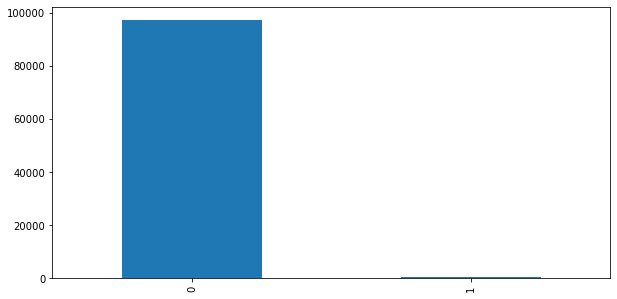

In [28]:
# TÉCNICA 3 DATA AUGMENTATION - UNDERSAMPLING: KNN o K-Nearest Neighbors
# Reduciremos datos con la técnica de KNN ya que de esta tipología de técnicas parece la más
# avanzada en cuanto a reducción de puntos.

enn = EditedNearestNeighbours(n_neighbors = 10)
enn.fit_resample(tr[['V1', 'V2']], tr[['class']])
print('Filas que nos quedamos con EditedNearestNeighbours:', len(enn.sample_indices_))
tr_KNN = tr.iloc[enn.sample_indices_]
evaluar_sistema(tr_KNN[['V1', 'V2']], tr_KNN[['class']])
tr_KNN['class'].value_counts().plot.bar()

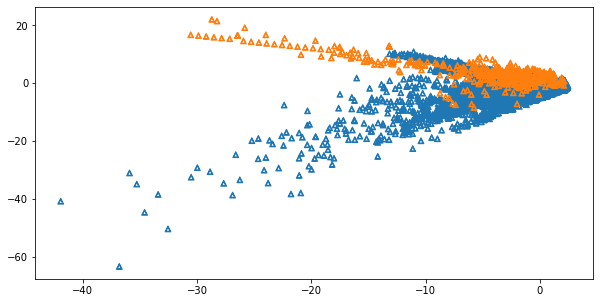

In [29]:
colors = tr_KNN['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_KNN['V1'], 
    y = tr_KNN['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

Filas que nos quedamos con RandomUnderSampler: 200000
Evaluando...
Puntuación obtenida: 1346404 (más alta es peor)


<AxesSubplot:>

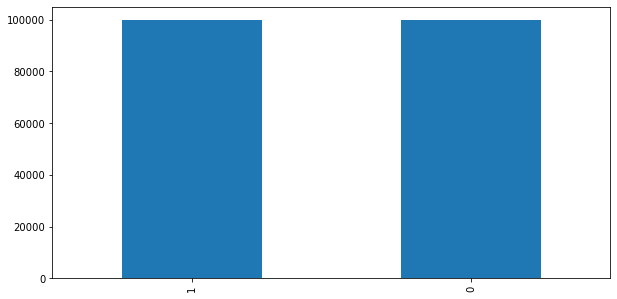

In [30]:
# TÉCNICA 4 DATA AUGMENTATION - OVERSAMPLING: RandomOverSampler
# Realizamos aumento aleatorio de puntos.
#Aplicamos RandomOverSampler
ros = RandomOverSampler(random_state = 0)
ros.fit_resample(tr[['V1', 'V2']], tr[['class']])
print('Filas que nos quedamos con RandomUnderSampler:', len(ros.sample_indices_))
tr_oversampled = tr.iloc[ros.sample_indices_]
evaluar_sistema(tr_oversampled[['V1', 'V2']], tr_oversampled[['class']])
tr_oversampled['class'].value_counts().plot.bar()

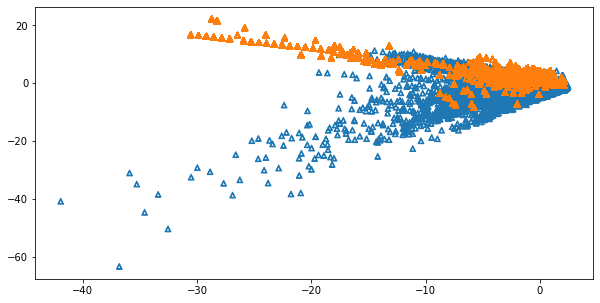

In [31]:
colors = tr_oversampled['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_oversampled['V1'], 
    y = tr_oversampled['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

Datos después de SMOTE: 200000
Evaluando...
Puntuación obtenida: 1301335 (más alta es peor)


<AxesSubplot:>

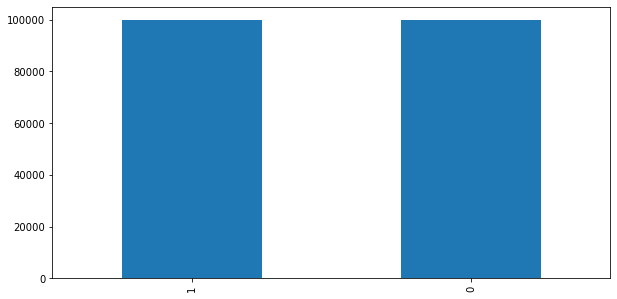

In [32]:
# TÉCNICA 5 DATA AUGMENTATION - OVERSAMPLING: SMOTE
# Ampliaremos datos de forma sintéctica con la técnica de SMOTE. Dado que es una técnica más
# elaborada de Oversampling, ya que esta basada en KNN , pero en este caso genera más puntos.

smote = SMOTE()
X, y = smote.fit_resample(tr[['V2', 'V1']], tr[['class']])
tr_smote = pd.DataFrame(X).rename(columns = {0 : 'V2', 1 : 'V1'})
tr_smote['class'] = y
print("Datos después de SMOTE: {}".format(len(y)))
evaluar_sistema(tr_smote[['V1', 'V2']], tr_smote[['class']])
tr_smote['class'].value_counts().plot.bar()

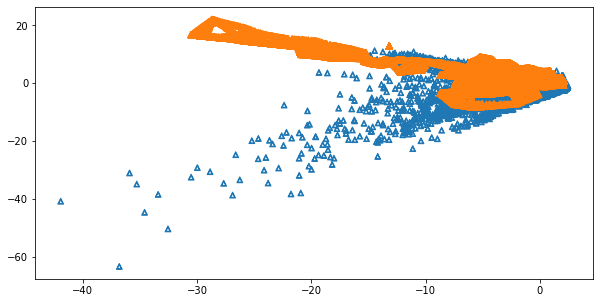

In [33]:
colors = tr_smote['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_smote['V1'], 
    y = tr_smote['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

Datos después de ADASYN: 200005
Evaluando...
Puntuación obtenida: 1558990 (más alta es peor)


<AxesSubplot:>

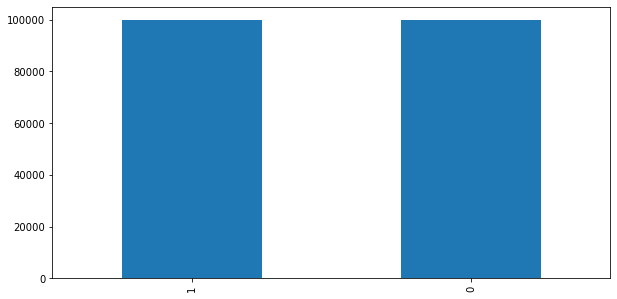

In [34]:
# TÉCNICA 6 DATA AUGMENTATION - OVERSAMPLING: ADASYN
# Ampliaremos datos de forma sintéctica con la técnica de ADASYN. Derivado de SMOTE, tiene en
# en cuenta la densidad de puntos de la clase mayoritaria.

ada = ADASYN()
X, y = ada.fit_resample(tr[['V1', 'V2']], tr[['class']])
# convertimos a DataFrame por comodidad y renombramos las columnas de datos en X a los nombres que teníamos previamente.
tr_ada = pd.DataFrame(X).rename(columns = {0 : 'V1', 1 : 'V2'})
tr_ada['class'] = y
print("Datos después de ADASYN: {}".format(len(y)))
evaluar_sistema(tr_ada[['V1', 'V2']], tr_ada[['class']])
tr_ada['class'].value_counts().plot.bar()

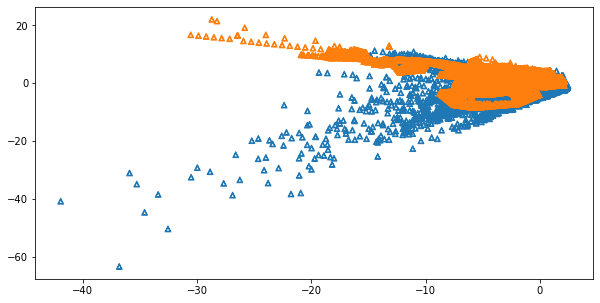

In [35]:
colors = tr_ada['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_ada['V1'], 
    y = tr_ada['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

Filas que nos quedamos con RandomUnderSampler: 984
Datos después de SMOTE: 205000
Evaluando...
Puntuación obtenida: 5000 (más alta es peor)


<AxesSubplot:>

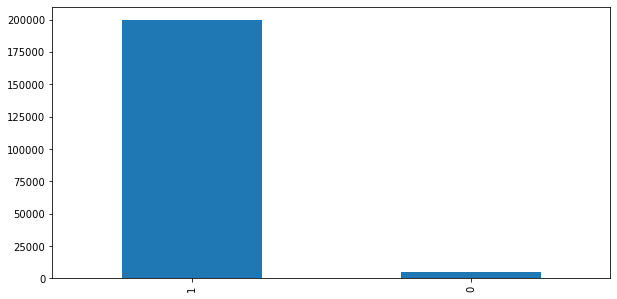

In [93]:
# TÉCNICA 7 DATA AUGMENTATION - UNDERSAMPLING+OVERSAMPLING+: RandomUnderSampler+SMOTE

#Aplicamos RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
rus.fit_resample(tr[['V1', 'V2']], tr[['class']])
print('Filas que nos quedamos con RandomUnderSampler:', len(rus.sample_indices_))
tr_undersampled = tr.iloc[rus.sample_indices_]

#Aplicamos SMOTE
smote=SMOTE(sampling_strategy={0 : 5000, 1 : 200000})
X, y = smote.fit_resample(tr_undersampled[['V1', 'V2']], tr_undersampled[['class']])
tr_undersampled_smote = pd.DataFrame(X).rename(columns = {0 : 'V1', 1 : 'V2'})
tr_undersampled_smote['class'] = y
print("Datos después de SMOTE: {}".format(len(y)))


evaluar_sistema(tr_undersampled_smote[['V1', 'V2']], tr_undersampled_smote[['class']])
tr_undersampled_smote['class'].value_counts().plot.bar()


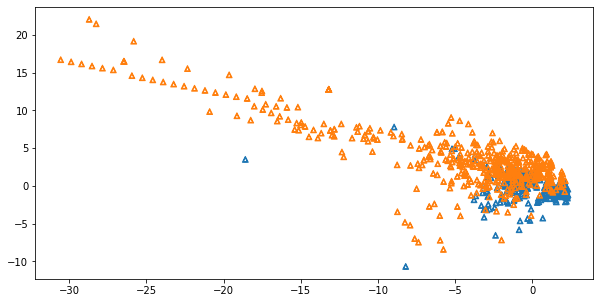

In [37]:
colors = tr_undersampled_smote['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_undersampled_smote['V1'], 
    y = tr_undersampled_smote['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

Filas que nos quedamos con RandomUnderSampler: 984
Datos después de ADA: 205075
Evaluando...
Puntuación obtenida: 5026 (más alta es peor)


<AxesSubplot:>

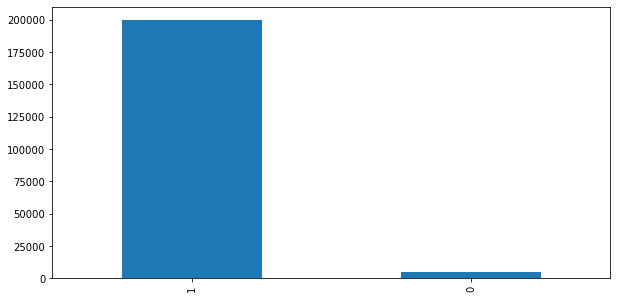

In [85]:
# TÉCNICA 8 DATA AUGMENTATION - UNDERSAMPLING+OVERSAMPLING: RandomUnderSampler+ADA

#Aplicamos RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
rus.fit_resample(tr[['V1', 'V2']], tr[['class']])
print('Filas que nos quedamos con RandomUnderSampler:', len(rus.sample_indices_))
tr_undersampled = tr.iloc[rus.sample_indices_]

tr_undersampled
#Aplicamos ADASYN
ada = ADASYN({0 : 5000, 1 : 200000})
X, y = ada.fit_resample(tr_undersampled[['V1', 'V2']], tr_undersampled[['class']])
tr_undersampled_ada = pd.DataFrame(X).rename(columns = {0 : 'V1', 1 : 'V2'})
tr_undersampled_ada['class'] = y
print("Datos después de ADA: {}".format(len(y)))
evaluar_sistema(tr_undersampled_ada[['V1', 'V2']], tr_undersampled_ada[['class']])
tr_undersampled_ada['class'].value_counts().plot.bar()

In [61]:
tr_undersampled.groupby('class').size()

class
0    492
1    492
dtype: int64

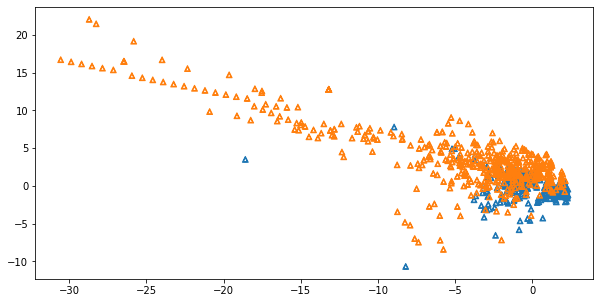

In [39]:
colors = tr_undersampled_ada['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_undersampled_ada['V1'], 
    y = tr_undersampled_ada['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

Filas que nos quedamos con EditedNearestNeighbours: 97837
Datos después de ADA: 205026
Evaluando...
Puntuación obtenida: 249550 (más alta es peor)


<AxesSubplot:>

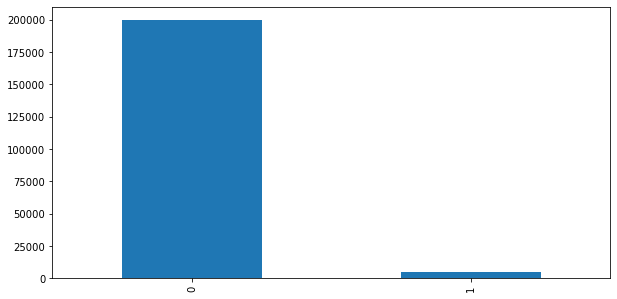

In [97]:
# TÉCNICA 9 DATA AUGMENTATION - UNDERSAMPLING+OVERSAMPLING: KNN+ADA

#Aplicamos KNN
enn = EditedNearestNeighbours(n_neighbors = 10)
enn.fit_resample(tr[['V1', 'V2']], tr[['class']])
print('Filas que nos quedamos con EditedNearestNeighbours:', len(enn.sample_indices_))
tr_KNN = tr.iloc[enn.sample_indices_]

#Aplicamos ADASYN
ada = ADASYN(sampling_strategy={0 : 200000, 1 : 5000})
X, y = ada.fit_resample(tr_KNN[['V1', 'V2']], tr_KNN[['class']])
tr_KNN_ada = pd.DataFrame(X).rename(columns = {0 : 'V1', 1 : 'V2'})
tr_KNN_ada['class'] = y
print("Datos después de ADA: {}".format(len(y)))
evaluar_sistema(tr_KNN_ada[['V1', 'V2']], tr_KNN_ada[['class']])
tr_KNN_ada['class'].value_counts().plot.bar()

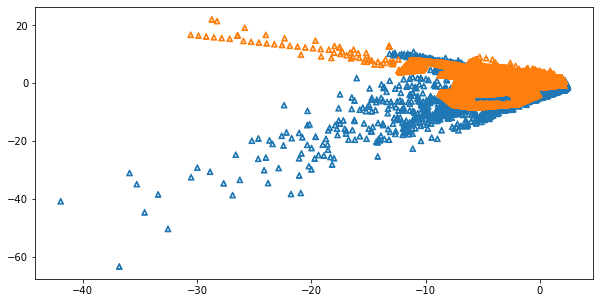

In [41]:
colors = tr_KNN_ada['class'].map({0 : "#1f77b4", 1: "#ff7f0e"})
plt.scatter(
    x = tr_KNN_ada['V1'], 
    y = tr_KNN_ada['V2'], 
    c=colors,
    marker=r'$\vartriangle$'
)

¿Has logrado proteger al Imperio Galáctico de transmisiones enemigas? ¿O has tenido problemas de "jubilación"?
* ¿Qué problemas ves a estos métodos de data augmentation?
    * Solo hemos conseguido una puntuación sensiblemente inferior con la técnica de **RandomUnderSampler** con 6617, después la de **KNN** con 21147 y **Tomek** con 21837. Las algoritmos de **OVERSAMPLING** tanto **SMOTE** como **ADASYN** generan putuaciones muy por encima incluso sin tratamiento del dataframe. Los tratamientos con técnicas combinadas tampoco mejoran los resultados. Aunque entre estas si son mejores las que aplican **undersampling + oversampling** que a la inversa. Es más aplicando técnicas mixtas si primero aplicamos **RandomUnderSampler** luego es indiferente para el resultado aplicar SMOTE o ADASYN se **obtiene el mismo resultado**
    * Mi conclusión es:
        * Para este caso funcionan mejor los de **UNDERSAMPLING** que reducen los puntos y son capaces de predecir mejor. Los **OVERSAMPLING** para este caso empeoran mucho por que al generar más densidad de puntos aunque sea de la clase minoritaria.
        * Creo que la disposición de los datos de clase 0 y 1 muy polarizadas donde se concentran en zonas bien diferencias hacen que los algorítmos bien sean de UNDERSLAPING como de OVERSLAPING basados en el cáslculo a traves de vecinos no funcionen todo lo bien que se quisiera, ya que en la mayoría de los casos o no encuentran vecinos de clase contraria, para eliminar como el KNN o no encuentra lejos vecinos para generar de forma sintética com el SMOTE.
        
    <BR>
    
    
    
    
* ¿Qué crees que es más razonable cuando te enfrentas a un problema de este tipo?
    * En este caso que los datos estuvieran menos polarizados en areas muy localizadas y que estuvieran más repartidos los de la clase 0 y la clase 1.
    
    
* La función de evaluación del sistema penaliza con un punto si la clase predecida es de valor 1 pero 50 puntos si la clase predecida es de valor 0. ¿Por qué crees que pasa esto?
    
    
    * Por que tiene mucho más valor para la predicción predecir los datos anámalos o minoritarios, en este caso los de valor 1

***

### Punto extra

`Como tarea final, se le exige que nos facilite una identificación. Muestre su rostro real y provea al IMPERIO GALÁCTICO de datos suficientes para poder identificale desde todos los ángulos posibles una vez pase a formar parte de nuestro equipo de datos. Se requiere un mínimo de 5 ejemplos de su rostro para entrenar correctamente el sistema y que nuestras medidas de seguridad no cometan el error de considerarlo una amenaza.`

Dimensión Y: 362, Dimensión X: 644, Canales: 3


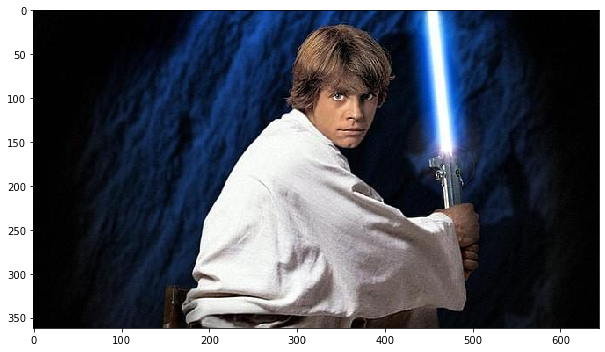

In [42]:
# Hazte una "selfie" y copiala en la carpeta imgs de este challenge. Cárgala y visualízala correctamente.
# Procésala como se te mostró en el worksheet para que el Imperio pueda identificarte correctamente.

from skimage import io, transform
from skimage.color import convert_colorspace
img = io.imread("imgs/luke-skywalker.jpg")
print("Dimensión Y: {}, Dimensión X: {}, Canales: {}".format(
    img.shape[0], img.shape[1], img.shape[2]))
io.imshow(img)

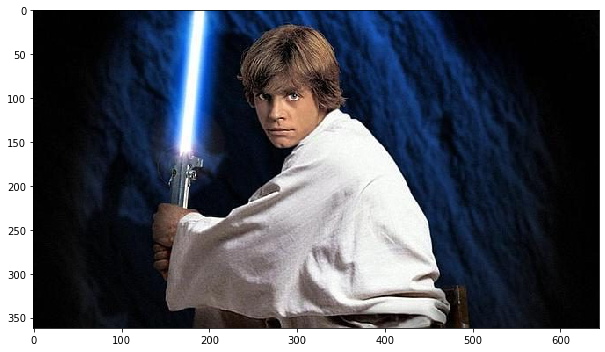

In [43]:
# Nos mostramos con la perspectiva del otro lado ... pero no del lado oscuro
rot_img = img[::, ::-1, :]
io.imshow(rot_img)

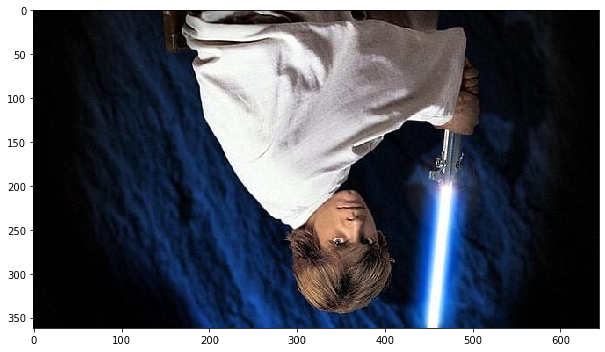

In [44]:
# Hacemos el pino ...
io.imshow(np.flipud(img))

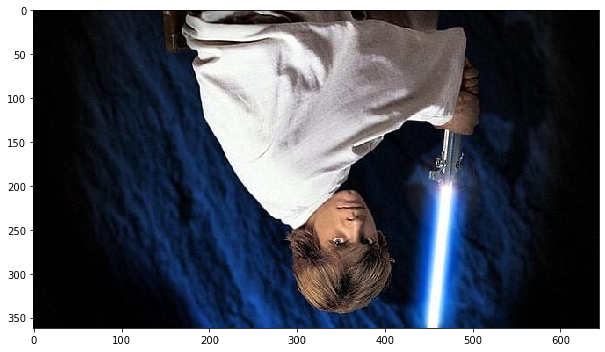

In [45]:
# Esta opción es alternativa a la anterior pero trabajando sobre la matriz de la imagen
img_rotate = img[::-1]
io.imshow(img_rotate)

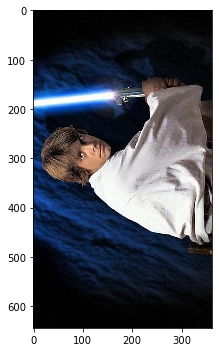

In [46]:
# Nos ponemos tumbados en el suelo mirando al techo ...
io.imshow(transform.rotate(img, 90, resize=True))

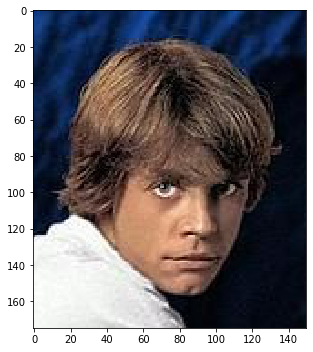

In [47]:
# Nos hacen una identificación facial
startx = 275
starty = 0
img.shape
cropped = img[starty:starty+175, startx:startx+150, :]
io.imshow(cropped)

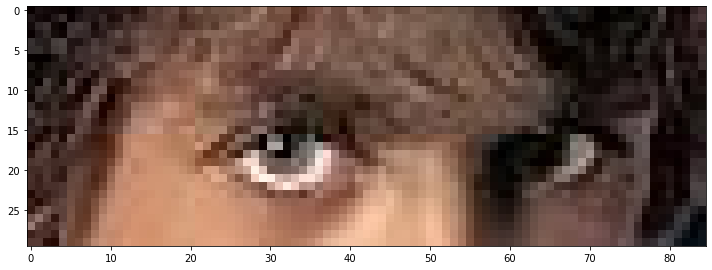

In [48]:
# Nos hacen reconocimiento de los ojos
startx = 40
starty = 80
cropped2 = cropped[starty:starty+30, startx:startx+85, :]
io.imshow(cropped2)

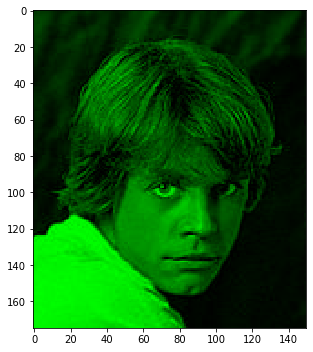

In [49]:
# Nos ponemos verdes como nuestro maestro ...
green_img = cropped.copy()
green_img[:,:,[0,2]] = 0 
io.imshow(green_img)

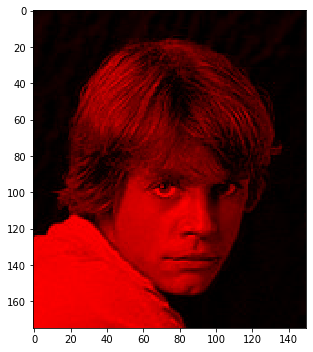

In [50]:
# Nos ponemos rojos ... algo nos sento mal
red_img = cropped.copy()
red_img[:,:,[1,2]] = 0 
io.imshow(red_img)

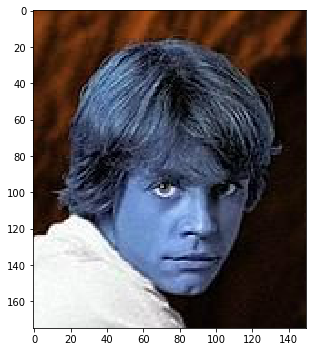

In [51]:
# Buff se nos ha cambiado el color por completo
inv_color_img = cropped.copy()
inv_color_img = inv_color_img[:,:,::-1] 
io.imshow(inv_color_img)

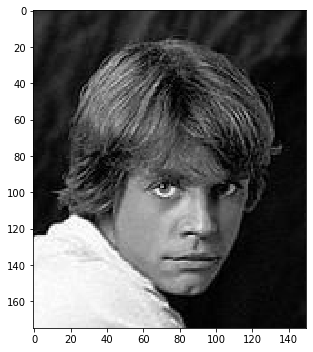

In [52]:
#Hasta hemos perdido el color ...
gray_img = 0.2989 * cropped[:,:,0] + 0.5870 * cropped[:,:,1] + 0.1140 * cropped[:,:,2]
gray_img = gray_img.astype(np.uint8)
io.imshow(gray_img)

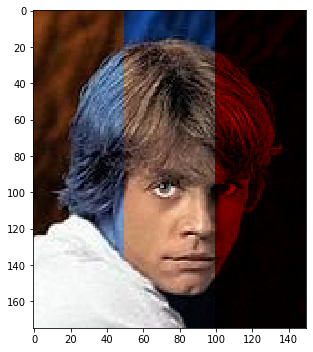

In [53]:
# A veces soy multicolor

from skimage.transform import rescale, resize, downscale_local_mean

img1 = resize(inv_color_img, (cropped.shape[0] , cropped.shape[1]),
                       anti_aliasing=True)

img2 = resize(cropped, (cropped.shape[0] , cropped.shape[1]),
                       anti_aliasing=True)

img3 = resize(red_img, (cropped.shape[0] , cropped.shape[1]),
                       anti_aliasing=True)


height_of_first_image = img1.shape[0]
width_of_first_image = img1.shape[1]

height_of_the_second_image = img2.shape[0]
width_of_the_second_image = img2.shape[1]

height_of_the_third_image = img3.shape[0]
width_of_the_third_image = img3.shape[1]

img1_third = img1[:, : width_of_first_image//3, :] # tomamos el primer tercio de la primera imagen
img2_third = img2[:, width_of_the_second_image//3 :((width_of_the_second_image//3)*2),:] # tomamos el segundo tercio de la segunda imagen
img3_third = img3[:, ((width_of_the_third_image//3)*2) :,:] # tomamos el tercer tercio de la segunda imagen

img_collection=(img1_third,img2_third,img3_third)
final_image= np.concatenate(img_collection,axis=1)
io.imshow(final_image)

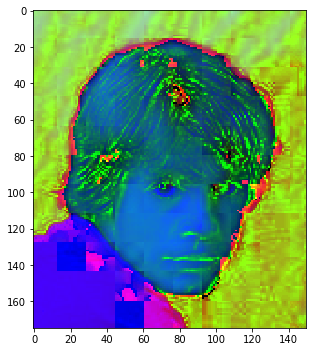

In [54]:
#Y alguna pocas se me satura el color
img_hsv = convert_colorspace(cropped, 'RGB', 'HSV')
io.imshow(img_hsv)